In [1]:
import pandas as analytics
import os
import matplotlib.pyplot as graph
import numpy as maths
from math import log
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('../data/')

In [3]:
filename = 'data5.csv'

# Total 9 datasets
# data 5, data 8 -> Multi Class
# rest all binary class

# Manual Preprocessing

In [4]:
df_raw = analytics.read_csv(filename,header=None)
df_raw

,0,1,2,3
0,-6.2213,2.84320,10.54700,1
1,-14.9730,-6.42750,3.83370,1
2,-5.9850,-3.94020,11.98600,1
3,-6.8994,1.87140,11.22500,1
4,-4.8246,4.94470,17.26100,1
...,...,...,...,...
295,1.8102,-0.59976,0.63192,3
296,9.5219,13.22700,13.51400,3
297,-3.8302,-0.51635,-0.49433,3
298,-4.2867,-4.10830,-1.15490,3


In [5]:
df_raw[3].unique()

array([1, 2, 3])

In [6]:
# df_raw = df_raw.drop(['sex','age'],axis =1)
df_raw[2] = df_raw[2].replace(-1,0)
df_raw.to_csv('check.csv',header=None,index=False)
df_raw = analytics.read_csv('check.csv',header=None)

In [7]:
cols = ['x'+str(i+1) for i in df_raw.columns[:-1]] + ['y']
df_raw.columns = cols
df_raw['y'] = df_raw['y'].replace(-1,0)
df_raw

,x1,x2,x3,y
0,-6.2213,2.84320,10.54700,1
1,-14.9730,-6.42750,3.83370,1
2,-5.9850,-3.94020,11.98600,1
3,-6.8994,1.87140,11.22500,1
4,-4.8246,4.94470,17.26100,1
...,...,...,...,...
295,1.8102,-0.59976,0.63192,3
296,9.5219,13.22700,13.51400,3
297,-3.8302,-0.51635,-0.49433,3
298,-4.2867,-4.10830,-1.15490,3


# Working Processing

In [8]:
training_perc = 0.7

In [9]:
training_number =  int(training_perc * len(df_raw))
df_raw = df_raw.sample(frac = 1)
df_train = df_raw[:training_number]
df_test = df_raw[training_number:]

In [10]:
maxima = {}
minima = {}
for col in df_raw.columns[:-1]:
    maxima.update({col:df_train[col].max()})
    minima.update({col:df_train[col].min()})    
    df_train[col] = (df_train[col] - minima[col])/(maxima[col] - minima[col])
df_train

,x1,x2,x3,y
83,0.212099,0.133517,0.945439,1
5,0.121552,0.043232,0.762602,1
281,0.469035,0.210040,0.369423,3
77,0.152024,0.202805,0.724918,1
245,0.467193,0.506952,0.212881,3
...,...,...,...,...
61,0.254810,0.308376,0.767757,1
212,0.506713,0.302647,0.382768,3
261,0.625701,0.398836,0.386114,3
225,0.507349,0.312514,0.544615,3


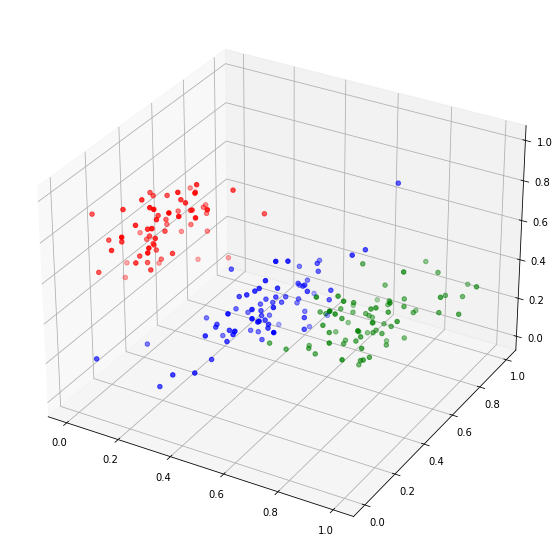

In [11]:
df_c1 = df_train[df_train['y'] == 1]
df_c2 = df_train[df_train['y'] == 2]
df_c3 = df_train[df_train['y'] == 3]

    
if len(df_raw.columns) == 3:
    figure = graph.figure(figsize=(10,10))
    graph.scatter(df_pos['x1'], df_pos['x2'], c = 'blue',label = 'Positive Class')
    graph.scatter(df_neg['x1'], df_neg['x2'], c = 'red', label = 'Negative Class')
    graph.title("Class")
    graph.xlabel("X1")
    graph.ylabel("X2")
    graph.legend()
    graph.show()
elif len(df_raw.columns) == 4 :
    figure = graph.figure(figsize = (10,10))
    ax = figure.add_subplot(projection='3d')
    ax.scatter(df_c1['x1'],df_c1['x2'],df_c1['x3'],c = 'red',label = "Class 1")
    ax.scatter(df_c2['x1'],df_c2['x2'],df_c2['x3'],c = 'green',label = "Class 2")
    ax.scatter(df_c3['x1'],df_c3['x2'],df_c3['x3'],c = 'blue', label = "Class 3")
    
    # ax.show()
    

In [12]:
mu_c1 = df_c1.iloc[:,:-1].mean()
mu_c2 = df_c2.iloc[:,:-1].mean()
mu_c3 = df_c3.iloc[:,:-1].mean()

In [13]:
x_c1 = (df_c1 - mu_c1).iloc[:,:-1]
x_c2 = (df_c2 - mu_c2).iloc[:,:-1]
x_c3 = (df_c3 - mu_c3).iloc[:,:-1]

In [14]:
covariance_matrix_c1 = (x_c1.T @ x_c1) / (len(x_c1) - 1 ) 
covariance_matrix_c2 = (x_c2.T @ x_c2) / (len(x_c2) - 1 ) 
covariance_matrix_c3 = (x_c3.T @ x_c3) / (len(x_c3) - 1 ) 

In [15]:
covariance_matrix = ((len(x_c1) - 1 )*covariance_matrix_c1 + (len(x_c2) - 1 )*covariance_matrix_c2 + (len(x_c3) - 1 )*covariance_matrix_c3)/((len(x_c1) - 1 ) + (len(x_c1) - 1 ) + (len(x_c3) - 1 ))
covariance_matrix

,x1,x2,x3
x1,0.011362,0.008456,0.005923
x2,0.008456,0.015437,0.004019
x3,0.005923,0.004019,0.014017


In [16]:
mu_c1 = df_c1.iloc[:,:-1].mean()
mu_c2 = df_c2.iloc[:,:-1].mean()
mu_c3 = df_c3.iloc[:,:-1].mean()

In [17]:
covariance_matrix_inv = maths.linalg.inv(covariance_matrix)
covariance_matrix_inv

array([[176.61307264, -83.55310161, -50.67392864],
       [-83.55310161, 109.53299048,   3.8979114 ],
       [-50.67392864,   3.8979114 ,  91.64049715]])

In [18]:
w_c1_c2 = covariance_matrix_inv @ maths.array(mu_c1 - mu_c2)
w_c1_c2 = maths.array(w_c1_c2).reshape(-1,1)
w_c2_c3 = covariance_matrix_inv @ maths.array(mu_c2 - mu_c3)
w_c2_c3 = maths.array(w_c2_c3).reshape(-1,1)

# w_c1_c2.shape

In [19]:
pi_c1 = len(df_c1)/len(df_train)
pi_c2 = len(df_c2)/len(df_train)
pi_c3 = len(df_c3)/len(df_train)

In [20]:
w0_c1_c2 = (- 0.5 * mu_c1 @ covariance_matrix_inv @ mu_c1.T) + (0.5 * mu_c2 @ covariance_matrix_inv @ mu_c2.T) + log(abs(pi_c1 / pi_c2))
w0_c2_c3 = (- 0.5 * mu_c2 @ covariance_matrix_inv @ mu_c2.T) + (0.5 * mu_c3 @ covariance_matrix_inv @ mu_c3.T) + log(abs(pi_c2 / pi_c3))
# w0

In [21]:
hyperplane_c1_c2 = maths.array([-((w_c1_c2[0] * df_train['x1']) + w0_c1_c2)/w_c1_c2[2] , -((w_c1_c2[1] * df_train['x2'])  + w0_c1_c2)/w_c1_c2[2]])
hyperplane_c2_c3 = maths.array([-((w_c2_c3[0] * df_train['x1']) + w0_c2_c3)/w_c2_c3[2] , -((w_c2_c3[1] * df_train['x2'])  + w0_c2_c3)/w_c2_c3[2]])

TypeError: Length of y (210) must match number of rows in z (2)

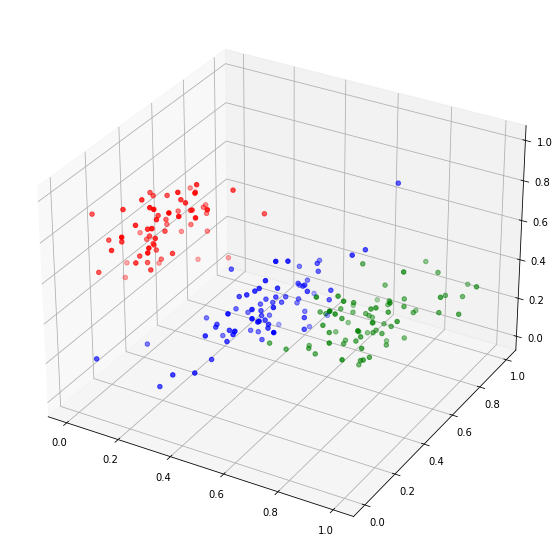

In [26]:
  
if len(df_raw.columns) == 3:
    figure = graph.figure(figsize=(10,10))
    graph.scatter(df_pos['x1'], df_pos['x2'], c = 'blue',label = 'Positive Class')
    graph.scatter(df_neg['x1'], df_neg['x2'], c = 'red', label = 'Negative Class')
    graph.title("Class")
    graph.xlabel("X1")
    graph.ylabel("X2")
    graph.legend()
    graph.show()
elif len(df_raw.columns) == 4 :
    figure = graph.figure(figsize = (10,10))
    ax = figure.add_subplot(projection='3d')
    ax.scatter(df_c1['x1'],df_c1['x2'],df_c1['x3'],c = 'red',label = "Class 1")
    ax.scatter(df_c2['x1'],df_c2['x2'],df_c2['x3'],c = 'green',label = "Class 2")
    ax.scatter(df_c3['x1'],df_c3['x2'],df_c3['x3'],c = 'blue', label = "Class 3")
    ax.contour(df_train['x1'],df_train['x2'],hyperplane_c1_c2,extend3d= True)
    ax.contour(df_train['x1'],df_train['x2'],hyperplane_c2_c3,extend3d= True)
    ax.legend()

    

In [27]:
df_

array([[ 2.00628248e-01,  1.12292074e-01,  4.51289661e-01,
         1.42020068e-01,  4.49492854e-01,  2.08778149e-01,
         6.14878409e-01,  1.79022806e-01,  5.56519102e-01,
         5.98121885e-01,  2.28605927e-01,  5.38228318e-01,
         6.44324712e-01,  1.74865809e-01,  7.87858687e-01,
         8.88775245e-01,  7.67511284e-01,  2.70468522e-01,
         5.20323150e-01,  5.26594198e-01,  7.02492578e-01,
         7.72680181e-01,  1.87118009e-01,  6.03405646e-01,
         5.64477563e-01,  6.37629760e-01,  3.55268514e-01,
         5.61564930e-01,  2.91021041e-01,  4.21692941e-01,
         6.48014046e-01,  6.09312896e-02,  5.58939459e-01,
         7.00753203e-01,  4.25953862e-01,  2.94759602e-01,
         2.71239754e-01,  4.59149666e-01,  7.07360640e-01,
         5.29082926e-01,  3.40111886e-01,  6.21515929e-01,
         5.69671073e-01,  1.03813989e-01,  3.48494251e-01,
         2.10610509e-01,  7.75633836e-01,  1.75494829e-01,
         6.45076800e-01,  4.49957781e-01,  1.65868100e-0

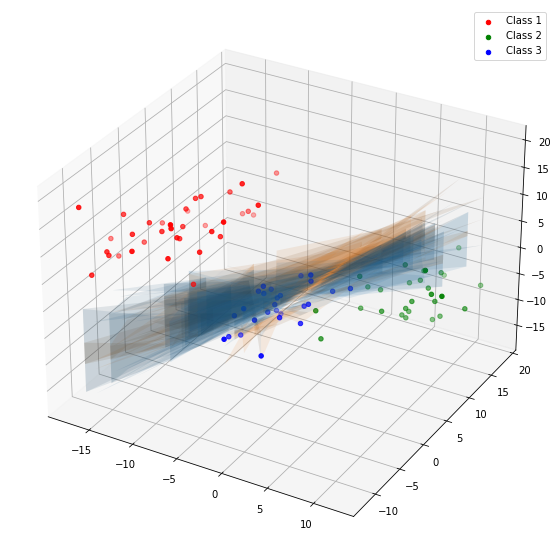

In [23]:
df_test_c1 = df_test[df_test['y'] == 1]
df_test_c2 = df_test[df_test['y'] == 2]
df_test_c3 = df_test[df_test['y'] == 3]

test_hyperplane_c1_c2 = maths.array([-((w_c1_c2[0] * df_test['x1']) + w0_c1_c2 )/w_c1_c2[2] , -((w_c1_c2[1] * df_test['x2'])  + w0_c1_c2)/w_c1_c2[2]])
test_hyperplane_c2_c3 = maths.array([-((w_c2_c3[0] * df_test['x1']) + w0_c2_c3 )/w_c2_c3[2] , -((w_c2_c3[1] * df_test['x2'])  + w0_c2_c3)/w_c2_c3[2]])

if len(df_raw.columns) == 3:
    figure = graph.figure(figsize=(10,10))
    graph.scatter(df_pos['x1'], df_pos['x2'], c = 'blue',label = 'Positive Class')
    graph.scatter(df_neg['x1'], df_neg['x2'], c = 'red', label = 'Negative Class')
    graph.title("Class")
    graph.xlabel("X1")
    graph.ylabel("X2")
    graph.legend()
    graph.show()
elif len(df_raw.columns) == 4 :
    figure = graph.figure(figsize = (10,10))
    ax = figure.add_subplot(projection='3d')
    ax.scatter(df_test_c1['x1'],df_test_c1['x2'],df_test_c1['x3'],c = 'red',label = "Class 1")
    ax.scatter(df_test_c2['x1'],df_test_c2['x2'],df_test_c2['x3'],c = 'green',label = "Class 2")
    ax.scatter(df_test_c3['x1'],df_test_c3['x2'],df_test_c3['x3'],c = 'blue', label = "Class 3")
    ax.plot_surface(df_test['x1'],df_test['x2'],test_hyperplane_c1_c2, alpha = 0.1)
    ax.plot_surface(df_test['x1'],df_test['x2'],test_hyperplane_c2_c3,alpha = 0.1)
    ax.legend()